<div>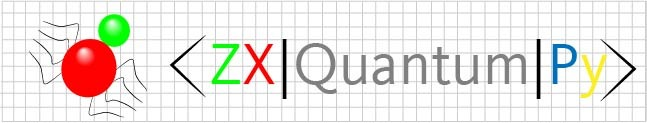</div>

We have already seen the main ingredients of PyZX, which can be used to create quantum circuits, simplifing those using PyZX. Now, we will combine everything we have learnt so far with some basic examples of entangled states and quantum gates.

# Examples: part-I 

In this Notebook, we will discuss some examples of quantum gates and entangled states, generating those in qiskit, in pyzx and then simplifying those using pyzx.

Please run the cell below to import all the necessary libraries by pressing 'shift' + 'enter' or by pressing the run button above.

In [1]:
from qiskit import QuantumCircuit  # importing QuantumCircuit from Qiskit
import pyzx as zx                  # importing pyZX

We start with an easy gate on two qubits, the controlled-NOT (also CNOT) gate. As it has no effect applied on the target qubit if the control qubit is in state $|0\rangle$, so, we apply a Hadamard gate before the CNOT gate to bring the control qubit in superposition. This way, we can create entanglement. The resulting state is one of the so-called $Bell$ $states$. 
### Constructing the Bell state: $|\Phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$.

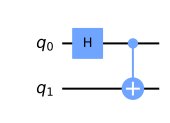

In [2]:
# For 2 qubit entangled state
Bell_circuit_Q = QuantumCircuit(2)      # Quantum circuit with 2 qubits

Bell_circuit_Q.h(0)                     # to bring the control qubit in superposition
Bell_circuit_Q.cx(0,1)                  # apply controlled not to create entangled state
Bell_circuit_Q.draw(output='mpl')       # draw the circuit

We now convert the above circuit to QASM format, which can further be converted to ZX-circuit and ZX-graph.

In [3]:
qasm_Bell_circuit = Bell_circuit_Q.qasm()   # convert the above circuit to QASM
print(qasm_Bell_circuit)                    # print the QASM code 

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
h q[0];
cx q[0],q[1];



Next we create a ZX-circuit from the above QASM code lines.

In [4]:
Bell_circuit = zx.qasm(qasm_Bell_circuit)  # convert to ZX-circuit
zx.draw(Bell_circuit)                      # draw ZX-circuit
Bell_circuit.gates                         # print gates

[HAD(0), CNOT(0,1)]

Before applying any simplification stratergy here, we have to convert the circuit to graph, for that we apply ```to_graph``` method and then print the stats of the graph, so that we can compare them after the simplification.

In [5]:
graph_Bell = Bell_circuit.to_graph()       # convert ZX-circuit to ZX-graph
zx.draw(graph_Bell)                        # draw it
graph_Bell                                 # print graph stats

Graph(7 vertices, 6 edges)

We now apply ```full_reduce``` simplifcation strategy to simplify the above graph, as wwe can see, there is not much to simplify in this case. The number of vertices in this case reduces from 7 to 6 and number of edges from 6 to 5.

In [6]:
zx.simplify.full_reduce(graph_Bell, quiet=False)   # simplify the graph using full_reduce method and print the steps involved
zx.draw(graph_Bell)                                # draw simplified graph
graph_Bell                                         # print graph stats

spider_simp: 1.  1 iterations


Graph(6 vertices, 5 edges)

Now we are going for Greenberger–Horne–Zeilinger state (GHZ state) which is an entangled state involving at least three qubits. These states were first studied by Daniel Greenberger, Michael Horne and Anton Zeilinger in 1989.
 
For n-qubits, the GHZ state can be written as: 

 $|GHZ\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle^{\otimes n} + |1\rangle^{\otimes n}\right)$.

 
And the simplest one with three-qubits, the GHZ state is given as: $|GHZ\rangle = \frac{|000\rangle + |111 \rangle}{\sqrt{2}} $.

### Contructing GHZ state: $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle\right)$:

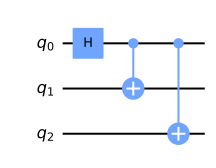

In [7]:
# For 3 qubits 
GHZ_circuit_Q = QuantumCircuit(3)      # Quantum circuit with 2 qubits

GHZ_circuit_Q.h(0)                     # to bring the control qubit in superposition
GHZ_circuit_Q.cx(0,1)                  # apply controlled not to create entangled state between qubit 0 and 1
GHZ_circuit_Q.cx(0,2)                  # apply controlled not to entangled 2 with the others
GHZ_circuit_Q.draw(output='mpl')       # draw the circuit

In [8]:
qasm_GHZ_circuit = GHZ_circuit_Q.qasm()   # convert the above circuit to QASM
GHZ_circuit = zx.qasm(qasm_GHZ_circuit)   # convert QASM to ZX-circuit
graph_GHZ = GHZ_circuit.to_graph()        # convert ZX-circuit to ZX-graph
zx.draw(graph_GHZ)                        # draw the ZX-graph
graph_GHZ                                 # print graph stats

Graph(11 vertices, 10 edges)

Next we apply the simplification procedure to the above ZX-graph representing GHZ state. In this case, the ```full_reduce``` function reduces the number of vertices to 9 from 11 and edges to 8 from 10.

In [9]:
zx.simplify.full_reduce(graph_GHZ, quiet=False)  # simplify the graph using full_reduce method and print the steps involved
zx.draw(graph_GHZ)                              # draw simplified graph
print(graph_GHZ)                                # print graph stats

spider_simp: 1. 1.  2 iterations


Graph(9 vertices, 8 edges)


The above two examples don't have much to do in terms of simplification of the ZX-diagrams because they are already simple and small. Simplification in ZX-calculus does a lot for large and complex circuits. We are considering very basic examples in this notebook for easy understanding. Let's now consider an example of two-qubit gate and another of three-qubit gate.

### SWAP gate
The SWAP gate is two-qubit operation. It swaps the state of the two input qubits involved in the operation. This SWAP gate in terms of CNOT gates is written as a sequence of three-CNOT gates alternating the control qubit. 

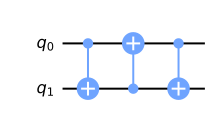

In [10]:
# Swap gate using 3 CNOTs
SWAP_circuit_Q = QuantumCircuit(2)

SWAP_circuit_Q.cx(0,1)
SWAP_circuit_Q.cx(1,0)
SWAP_circuit_Q.cx(0,1)
SWAP_circuit_Q.draw('mpl')

In [11]:
qasm_SWAP_circuit = SWAP_circuit_Q.qasm()  # convert the above circuit to QASM
SWAP_circuit = zx.qasm(qasm_SWAP_circuit) # convert QASM to ZX-circuit
graph_SWAP = SWAP_circuit.to_graph()       # convert ZX-circuit to ZX-graph
zx.draw(graph_SWAP)                        # draw the ZX-graph
graph_SWAP                                 # print graph stats

Graph(10 vertices, 11 edges)

In [12]:
zx.simplify.full_reduce(graph_SWAP, quiet=False) # simplify the graph using full_reduce method and print the steps involved
zx.draw(graph_SWAP)                              # draw simplified graph
print(graph_SWAP)                                # print graph stats

pivot_simp: 1. 1.  2 iterations
id_simp: 2. 2.  2 iterations


Graph(4 vertices, 2 edges)


In this example, the graph with 10 vertices and 11 edges reduces to a graph with just 4 vertices and 2 edges, which is pretty good.

### Toffoli gate
Now, let us consider the example of a three-qubit gate 'Toffoli gate'. In logic circuits, a Toffoli gate is a universal reversible logic gate, which means that we can build any classically reversible circuit from Toffoli gates. The Toffoli gate is also called a controlled-controlled-not (CCNOT) gate, which directly describes its action.

In [13]:
# creating Toffoli gate from QASM code
qasm_TOF_circuit = zx.qasm("""
qreg q[3];

ccx q[0],q[1],q[2];
""")
zx.draw(qasm_TOF_circuit)

In [14]:
TOF_circuit = zx.Circuit(3)                 # generating an empty quantum circuit with 3 qubits
TOF_circuit.add_gate("TOF",0,1,2)           # adding tofolli gate to qubits 0, 1 and 2
zx.draw(TOF_circuit)                        # draw the ZX-circuit

In [15]:
graph_TOF = TOF_circuit.to_graph()         # convert ZX-circuit to ZX-graph
zx.draw(graph_TOF)                         # draw the ZX-graph
graph_TOF                                  # print graph stats

Graph(27 vertices, 30 edges)

In [16]:
zx.simplify.full_reduce(graph_TOF, quiet=False) # simplify the graph using full_reduce method and print the steps involved
zx.draw(graph_TOF)                              # draw simplified graph
print(graph_TOF)                                # print graph stats

spider_simp: 2. 2. 1. 1.  4 iterations
id_simp: 2.  1 iterations
pivot_gadget_simp: 3. 1.  2 iterations
id_simp: 2.  1 iterations


Graph(17 vertices, 19 edges)


A single three-qubit Toffoli gate is represented by a graph with 27 vertices and 30 edges, after simplification it reduces to a graph with just 17 vertices and 19 edges.

Next, consider a last example in this notebook, which is a circuit composed of 2 qubits with some gates combined with its adjoint, the simplification of this circuit should result in an identity circuit. In this example, in place of using ```full_reduce``` simplification, we are going to consider each step envolved in the simplification procedure.

In [17]:
from fractions import Fraction             # importing Fraction 
ex8 = zx.Graph()                           # creating empty graph

vertices = {                               # creating set of vertices and adding them to graph
    0: ex8.add_vertex(row=1,qubit=0),
    1: ex8.add_vertex(row=1,qubit=1),
    2: ex8.add_vertex(zx.VertexType.X,row=2,qubit=0),
    3: ex8.add_vertex(zx.VertexType.Z,row=2,qubit=1),
    4: ex8.add_vertex(zx.VertexType.Z,row=3,qubit=0,phase=Fraction(1,2)),
    5: ex8.add_vertex(zx.VertexType.X,row=3,qubit=1,phase=Fraction(-1,2)),
    6: ex8.add_vertex(zx.VertexType.Z,row=4,qubit=0,phase=Fraction(-1,2)),
    7: ex8.add_vertex(zx.VertexType.X,row=4,qubit=1,phase=Fraction(1,2)),
    8: ex8.add_vertex(zx.VertexType.X,row=5,qubit=0),
    9: ex8.add_vertex(zx.VertexType.Z,row=5,qubit=1),
    10: ex8.add_vertex(row=6,qubit=0),
    11: ex8.add_vertex(row=6,qubit=1)}

edges = [(0,2), (1,3), (2,3), (2,4), (3,5), (4,6),
         (5,7), (6,8), (7,9), (8,9), (8,10), (9,11)] # list of edges of the graph

ex8.add_edges(edges)                      # adding edges to the graph
zx.draw(ex8, labels=True)                 # drawing the graph with labels on vertices

In the above graph, the circuits containing vertices 6 to 11 is basically the adjoint of the circuit with vertices 0 to 5, and hence, this combined circuit after simplification should reduce to identity. Let's see the step by step simplification of the above ZX-diagram.

As we can see from the above graph, that two pairs of vertices or spiders can be fused using the spider fusion rule, i.e., the pairs (4,6) and (5,7) can be fused and their phased added to form a single spider using the PyZX simplification method ```spider_simp``` as:

In [18]:
zx.simplify.spider_simp(ex8)
zx.draw(ex8, labels=True)

spider_simp: 2.  1 iterations


Now, as the vertices/spiders with label 4 and 5 are simply the phaseless Z- or X-spider with two wires, which according to identity rule, are equal to identities and hence can be removed using ```id_simp``` as follows:

In [19]:
zx.simplify.id_simp(ex8)
zx.draw(ex8, labels=True)

id_simp: 2.  1 iterations


Again we have spiders of the same color adjacent to each other, which can be fused with the ``spider_simp`` method. This method also removes the loop formed after spider fusion.

In [20]:
zx.simplify.spider_simp(ex8)
zx.draw(ex8, labels=True)

spider_simp: 1. 1.  2 iterations


And yet again, we have phaseless spiders, which are just identities, and can be reduced with the help of ```id_simp``` method as:

In [21]:
zx.simplify.id_simp(ex8)
zx.draw(ex8)

id_simp: 2.  1 iterations


This notebook was dedicated to simple examples of well-known quantum states and gates. In the next notebook, we will be considering the circuit of famous Grover's algorithm which promises to give quantum advantage.